In [ ]:
### Histogram and Equalized Histogram

<ipython-input-1-9540bc171b4d>:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,2), plt.hist(img.ravel(), 256, [0, 256]), plt.title("Original Histogram")
<ipython-input-1-9540bc171b4d>:11: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.subplot(2,2,4), plt.hist(equalized.ravel(), 256, [0, 256]), plt.title("Equalized Histogram")


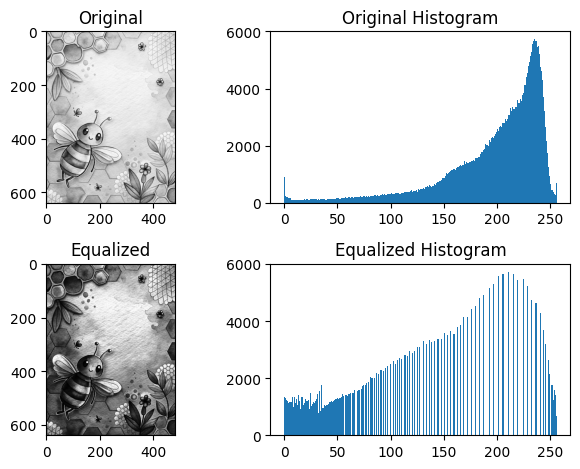

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('bee-8790316_640.jpg', 0)
equalized = cv2.equalizeHist(img)

plt.subplot(2,2,1), plt.imshow(img, cmap='gray'), plt.title("Original")
plt.subplot(2,2,2), plt.hist(img.ravel(), 256, [0, 256]), plt.title("Original Histogram")

plt.subplot(2,2,3), plt.imshow(equalized, cmap='gray'), plt.title("Equalized")
plt.subplot(2,2,4), plt.hist(equalized.ravel(), 256, [0, 256]), plt.title("Equalized Histogram")
plt.tight_layout()
plt.show()


In [ ]:
### Normalized Vs. Un-Normalized

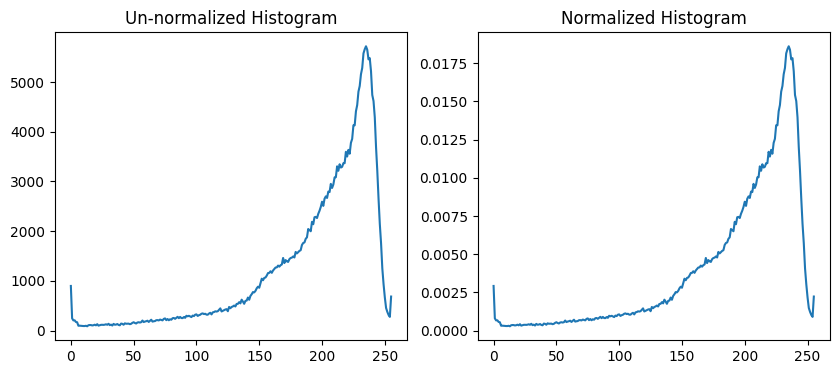

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('bee-8790316_640.jpg', 0)

# Un-normalized Histogram
hist_un = cv2.calcHist([img], [0], None, [256], [0, 256])

# Normalized Histogram (Divide by total pixels)
hist_norm = hist_un / hist_un.sum()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(hist_un), plt.title('Un-normalized Histogram')

plt.subplot(1, 2, 2)
plt.plot(hist_norm), plt.title('Normalized Histogram')

plt.show()


In [ ]:
### Image Transformation

<ipython-input-3-587ce5bbbb17>:12: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
<ipython-input-3-587ce5bbbb17>:12: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))


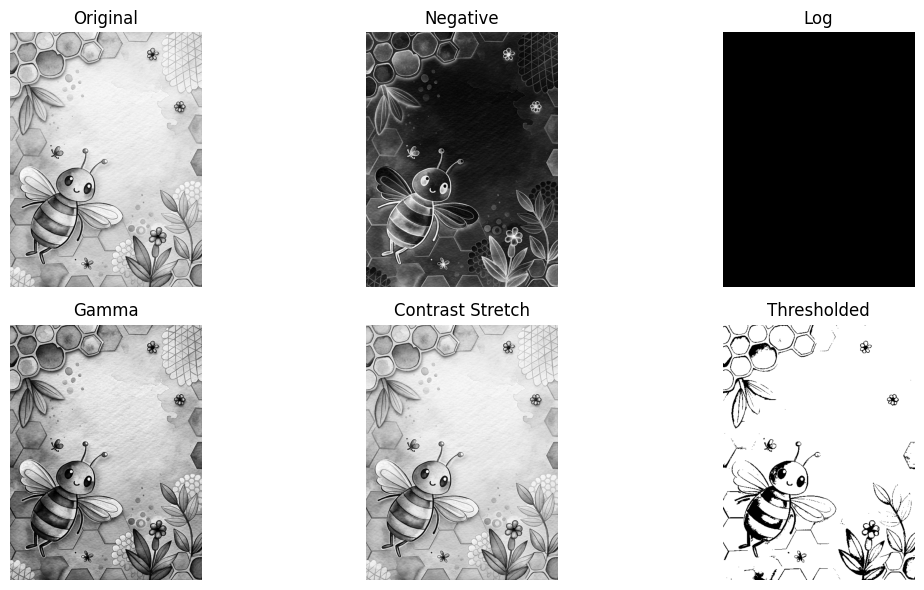

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('bee-8790316_640.jpg', 0)

# 1. Image Negation
neg_img = 255 - img

# 2. Log Transformation
c = 255 / np.log(1 + np.max(img))
log_img = c * (np.log(1 + img.astype(np.float32)))
log_img = np.array(log_img, dtype=np.uint8)

# 3. Gamma Correction
gamma = 2.0
gamma_img = np.array(255 * (img / 255) ** gamma, dtype=np.uint8)

# 4. Contrast Stretching (Piecewise Linear)
min_val = np.min(img)
max_val = np.max(img)
contrast_img = (img - min_val) * (255 / (max_val - min_val))
contrast_img = np.array(contrast_img, dtype=np.uint8)

# 5. Thresholding
T = 127
_, thresh_img = cv2.threshold(img, T, 255, cv2.THRESH_BINARY)

# Plot all transformations
titles = ['Original', 'Negative', 'Log', 'Gamma', 'Contrast Stretch', 'Thresholded']
images = [img, neg_img, log_img, gamma_img, contrast_img, thresh_img]

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
### Image Smooth

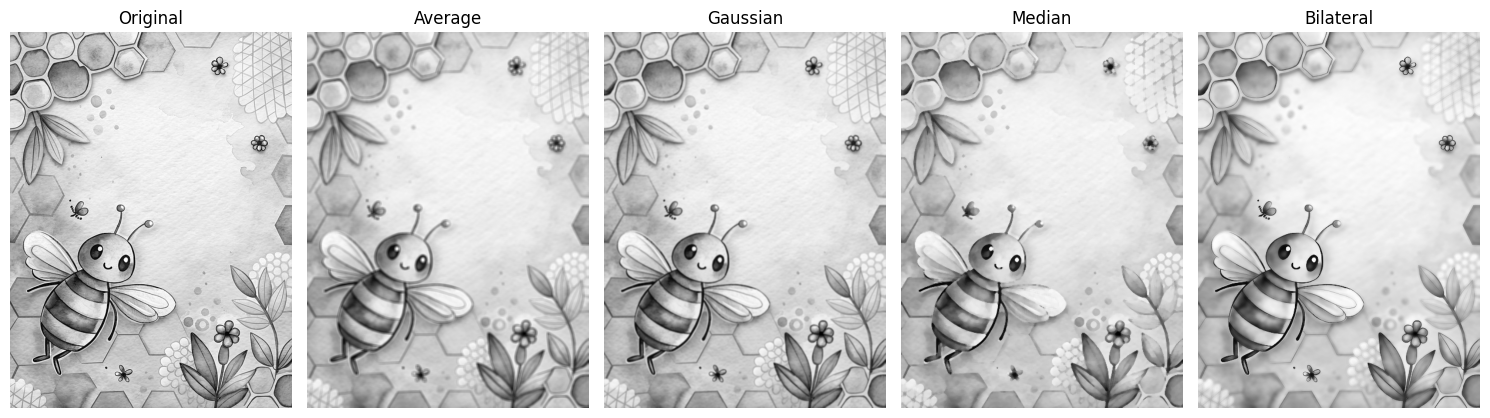

In [4]:
import cv2
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('bee-8790316_640.jpg', 0)

# Average Blur
avg_blur = cv2.blur(img, (5, 5))

# Gaussian Blur
gauss_blur = cv2.GaussianBlur(img, (5, 5), 1)

# Median Blur
med_blur = cv2.medianBlur(img, 5)

# Bilateral Filter
bilat_blur = cv2.bilateralFilter(img, 9, 75, 75)

# Plot
titles = ['Original', 'Average', 'Gaussian', 'Median', 'Bilateral']
images = [img, avg_blur, gauss_blur, med_blur, bilat_blur]

plt.figure(figsize=(15, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:

# https://colab.research.google.com/github/xn2333/OpenCV/blob/master/Image_Processing_in_Python_Final.ipynb#scrollTo=s9q4iqiRgHXD
# https://github.com/parekhakhil/pyImageSearch/blob/main/203_smoothing_and_blurring.ipynb
# https://github.com/OSGeoLabBp/tutorials/blob/master/english/img_processing/img_proc.ipynb

In [ ]:
### 1. Convert Image from RGB to HSV

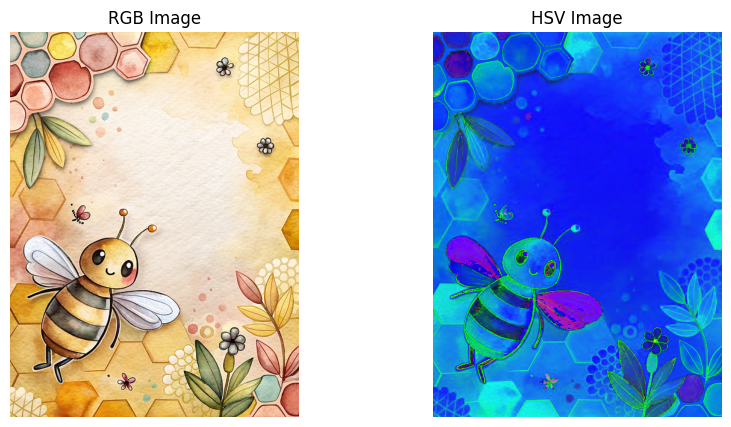

In [6]:

import cv2
import matplotlib.pyplot as plt

# Load image in RGB format
image_rgb = cv2.cvtColor(cv2.imread('bee-8790316_640.jpg'), cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Display RGB and HSV images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("RGB Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("HSV Image")
plt.imshow(image_hsv)
plt.axis('off')
plt.show()


In [ ]:
## 🎨 2. Visualize HSV Channels Separately


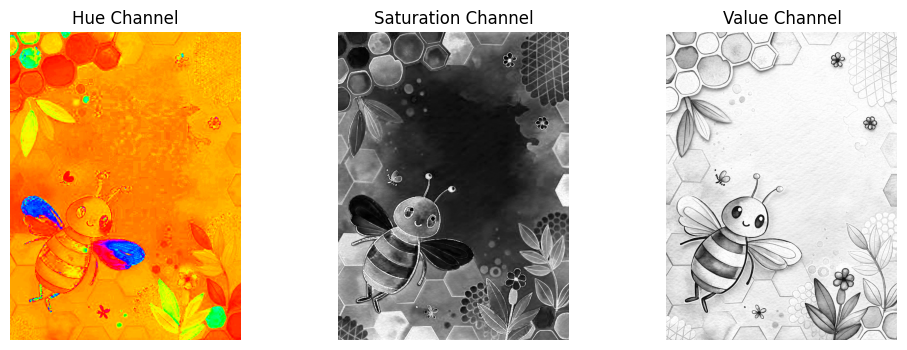

In [7]:

h, s, v = cv2.split(image_hsv)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title("Hue Channel")
plt.imshow(h, cmap='hsv')  # Use hsv colormap to show hue
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Saturation Channel")
plt.imshow(s, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Value Channel")
plt.imshow(v, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
### 3. Filter Specific Color (e.g., Red)

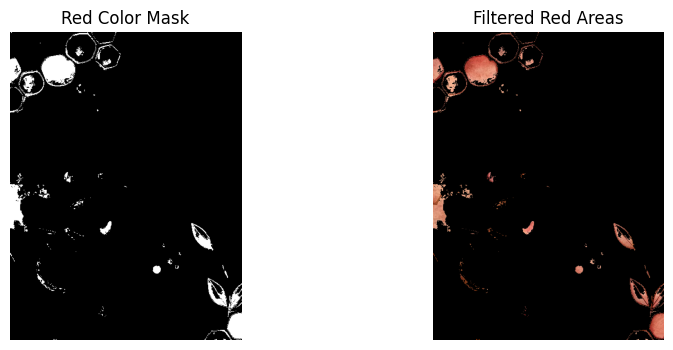

In [8]:
# Define red color range in HSV
lower_red = np.array([0, 100, 100])
upper_red = np.array([10, 255, 255])

# Threshold the image
mask = cv2.inRange(image_hsv, lower_red, upper_red)
result = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

# Show result
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Red Color Mask")
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Filtered Red Areas")
plt.imshow(result)
plt.axis('off')
plt.show()


In [ ]:
### 4. Convert Individual RGB Values to HSV

In [9]:
# Example RGB color
rgb_pixel = np.uint8([[[0, 255, 0]]])  # Green
hsv_pixel = cv2.cvtColor(rgb_pixel, cv2.COLOR_RGB2HSV)
print("HSV value of green pixel:", hsv_pixel[0][0])


HSV value of green pixel: [ 60 255 255]


In [ ]:
### 5. Interactively Change Hue or Brightness

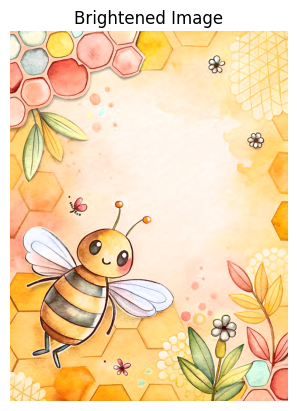

In [10]:
# Increase brightness (Value)
brighter = image_hsv.copy()
brighter[:, :, 2] = cv2.add(brighter[:, :, 2], 50)  # Add to V channel
brighter_rgb = cv2.cvtColor(brighter, cv2.COLOR_HSV2RGB)

plt.imshow(brighter_rgb)
plt.title("Brightened Image")
plt.axis('off')
plt.show()
